In [23]:
import os
from pathlib import Path
import importlib
d = os.getcwd()
if d.endswith('testing'):
    d = os.path.split(d)[0]
    os.chdir(d)
    print(d)

In [9]:
V = 12
AH = 100

c = .5
WB = AH*V*c


WD = 20

WB/WD

30.0

In [21]:


import submodules.helperFunctions.packDict as packDict
# from submodules.helperFunctions.packDict import unpackDict
# from submodules.helperFunctions.updateDict import updateDict
importlib.reload(packDict)
# d1 = unpackDict({'a':{'b':None},'b':[{'a':None},{'d':None}]})
# structure = {'configFiles':{'siteID':['siteConfiguration.yml',{'dataSourceID':'dataSourceConfiguration.yml'}]}}
structure = {'configFiles':{'siteID':{'':['siteConfiguration.yml'],'dataSourceID':['dataSourceConfiguration.yml']}}}

lout = []
for key,value in packDict.unpackDict(structure).items():
    if type(value) is not list:
        value = [value]
    for v in value:
        lout.append(os.path.join(key,v))
packDict.unpackDict(packDict.packDict(lout))

{'configFiles\\siteID\\siteConfiguration.yml': None,
 'configFiles\\siteID\\dataSourceID\\dataSourceConfiguration.yml': None}

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

f = r"C:\Users\User\GSC_Work\SCL_2025\20250910_decompressed\TOA5_57840_Flux_CSFormat_24_2025_08_06_2030.dat"
# f = r"C:\Users\User\GSC_Work\SCL_2025\20250910_decompressed2\TOA5_57840_Flux_CSFormat_24_2025_08_08_1400.dat"
df = pd.read_csv(f,skiprows=[0],header=[0,1,2])
# (df['FCH4_mass','ngCH4 m-2 s-1'].astype(float)*1e-6*3600).median()
cols = df.columns
df.columns = [c[0] for c in cols]
df.index = pd.to_datetime(df['TIMESTAMP'])
df = df.drop(['TIMESTAMP','FP_EQUATION'],axis=1)
df = df.astype(float)
df.loc[((df['USTAR']<.15)|(df['FC_QC']>4)|(df['FCH4_samples']<17500)|(df['CO2_sig_strgth_Min']<.95)),['FCH4_mass','FC_mass']]=np.nan
# df.loc[,['FCH4_mass','FC_mass']]=np.nan
df['FCH4'] = df['FCH4_mass']/16
df['FCH4_mass'] *= 1e-6*3600
df['FC_mass'] *= 1e-3*3600
# df['CH4_density'] *= 16.04
# df.loc[df]
# df['']
fig,ax=plt.subplots(2)
df['FCH4_mass'].plot(ax=ax[0])
df['FCH4'].plot(ax=ax[1])
df[['FCH4_mass','FCH4','FCH4_samples']].describe()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\User\\GSC_Work\\SCL_2025\\20250910_decompressed\\TOA5_57840_Flux_CSFormat_24_2025_08_06_2030.dat'

np.float64(21.375030074399998)

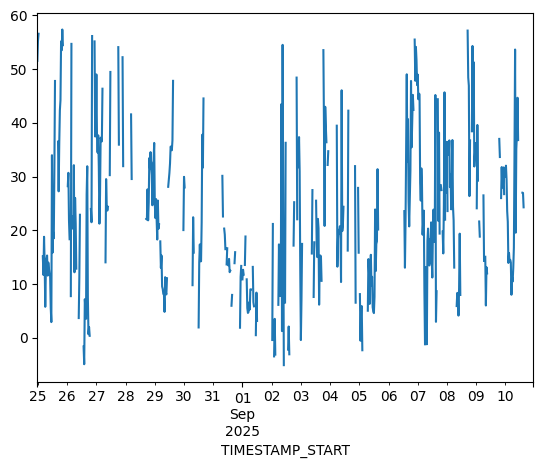

In [ ]:
df = pd.read_csv(r'C:\Users\User\GSC_Work\SCL_2025\20250910\57840_Flux_AmeriFluxFormat_13.dat')
df.index = pd.to_datetime(df['TIMESTAMP_START'],format='%Y%m%d%H%M')
# df['TIMESTAMP_START']
df['FCH4']=df['FCH4'].astype('float')
df['FCH4_SSITC_TEST']=df['FCH4_SSITC_TEST'].astype('float')
df.loc[((df['FCH4_SSITC_TEST']>1)|(df['FCH4']>1000)|(df['FCH4']<-100)),'FCH4']=np.nan
df['FCH4']*=16.04*1e-6*3600
df['FCH4'].plot()
df['FCH4'].median()
# df['CO2_sig_strgth_Min'].describe()

In [ ]:
import shutil
import scripts.databaseSetup.configurations as configurations
importlib.reload(configurations)

projectPath=os.path.join(d,'testing','outputs','testProject')
shutil.rmtree(projectPath, ignore_errors=True)

pc = configurations.template(projectPath=projectPath)
# packDict.unpackDict(pc.structure)

Running: <class 'scripts.databaseSetup.configurations.template'>

Saving: c:\Users\User\GSC_Work\EC_processing\testing\outputs\testProject\projectConfiguration.yml

{'startDate': {'datatype': 'datetime', 'description': 'Date of installation. For nested values, assumed to be same as parent object.  Optionally to provide if different from parent value.'}, 'endDate': {'datatype': 'datetime', 'description': 'Date of removal (or None). For nested values, assumed to be same as parent object.  Optionally to provide if different from parent value.'}, 'latitude': {'datatype': 'float', 'description': 'Latitude (WGS1984) Stored in decimal degrees.  Will parse input from other common format. For nested values, assumed to be same as parent object.  Optionally to provide if different from parent value.'}, 'longitude': {'datatype': 'float', 'description': 'Longitude (WGS1984) Stored in decimal degrees.  Will parse input from other common format. For nested values, assumed to be same as parent object.

In [ ]:
class tst:
    def __init__(self):
        self.b = 'a'
        P = os.path.join('a','self.b','c')
        for p in p.split(os.path.sep)


['a', 'b', 'c']

In [ ]:
from dataclasses import dataclass,field

@dataclass(kw_only=True)
class base:
    a: str = field(default='a',repr=True)
    b: bool = True

    def __post_init__(self):
        if self.b:
            self.__dataclass_fields__['a'].repr = False
        else:
            self.__dataclass_fields__['a'].repr = True


@dataclass(kw_only=True)
class pace(base):
    b: bool = True

@dataclass(kw_only=True)
class space(pace):
    b: bool = False


x = pace()
x = space()
print(x.__dataclass_fields__['a'].repr)
print(x)


True
space(a='a', b=False)


In [ ]:
# Source - https://stackoverflow.com/a/59987363
# Posted by bruno desthuilliers, modified by community. See post 'Timeline' for change history
# Retrieved 2026-01-08, License - CC BY-SA 4.0

class Base(object):
    def __post_init__(self):
        # just intercept the __post_init__ calls so they
        # aren't relayed to `object`
        pass

@dataclass
class NamedObj(Base):
    name: str

    def __post_init__(self):
        super().__post_init__()
        print("NamedObj __post_init__")
        self.name = "Name: " + self.name

@dataclass
class NumberedObj(Base):
    number: int = 0

    def __post_init__(self):
        super().__post_init__()
        print("NumberedObj __post_init__")
        self.number += 1

@dataclass
class NamedAndNumbered(NumberedObj, NamedObj):

    def __post_init__(self):
        super().__post_init__()
        print("NamedAndNumbered __post_init__")
        

NamedAndNumbered(name='c')

NamedObj __post_init__
NumberedObj __post_init__
NamedAndNumbered __post_init__


NamedAndNumbered(name='Name: c', number=1)

In [ ]:
from dataclasses import dataclass,field

@dataclass
class k:
    a: int = 1

x = [k()*3]
x

In [222]:
import scripts.database.dbTools as dbTools
import matplotlib.pyplot as plt
# import importlib
importlib.reload(dbTools)

# os.getcwd()
# os.path.abspath(r'testing\outputs\myProject')
db = dbTools.database(projectPath="testing/outputs/myProject",siteID='SCL',stageID='EasyFlux_2025',verbose=False)
dbYear = db.readDbYear(2025)
dbYear.columns
# plt.figure()
# plt.plot(dbYear.index,dbYear['AirTC_Avg'])


Index(['POSIX_Time_int64', 'clean_tv', 'air_mass_coeff', 'ALB', 'Bowen_ratio',
       'CH4_density', 'CH4_density_SIGMA', 'CH4_sig_strgth_Min', 'CO2_density',
       'CO2_density_SIGMA', 'CO2_sig_strgth_Min', 'daytime', 'e', 'ET',
       'ET_QC', 'ET_samples', 'e_amb', 'e_probe', 'e_sat', 'e_sat_amb',
       'e_sat_probe', 'FCH4_mass', 'FCH4_samples', 'FC_mass', 'FC_QC',
       'FC_samples', 'FETCH_70', 'FETCH_80', 'FETCH_90', 'FETCH_FILTER',
       'FETCH_INTRST', 'FETCH_MAX', 'FP_FETCH_INTRST', 'H', 'H2O_density',
       'H2O_density_probe', 'H2O_density_SIGMA', 'H2O_sig_strgth_Min',
       'hour_angle', 'H_QC', 'H_samples', 'LE', 'LE_QC', 'LE_samples',
       'LI7700_amb_press', 'LI7700_amb_tmpr', 'LW_IN', 'LW_OUT', 'NETRAD',
       'PA', 'PPFD_IN', 'RH_1_1_1', 'RH_1_1_2', 'RH_1_1_3', 'sonic_azimuth',
       'sun_azimuth', 'sun_declination', 'sun_elevation', 'SW_IN', 'SW_OUT',
       'TAU', 'TAU_QC', 'TA_1_1_1', 'TA_1_1_2', 'TA_1_1_3', 'TKE', 'TSTAR',
       'T_DP_1_1_1', 'T_DP_1_1_

In [289]:
dbYear = dbYear.loc[((dbYear['daytime'].isna()==False)&(dbYear.index.month>=8))].copy()
dbYear['CO2_sig_strgth_Min'].describe()

count    2548.000000
mean        0.932644
std         0.096874
min         0.313210
25%         0.933012
50%         0.962116
75%         0.991057
max         1.003409
Name: CO2_sig_strgth_Min, dtype: float64

FC       -0.277268
FCH4    697.117981
LE       21.917099
dtype: float32


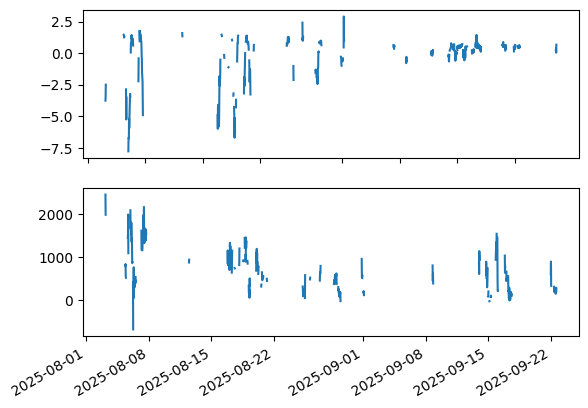

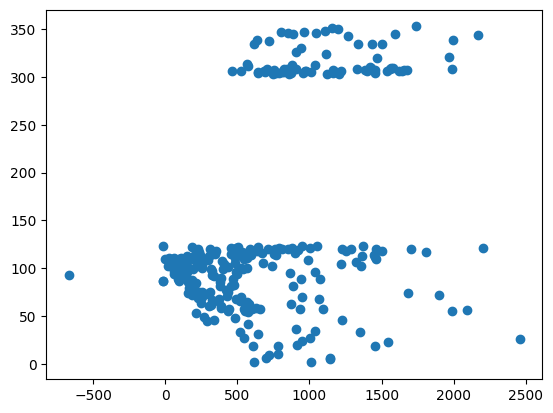

In [472]:
def filt(df,flux):
    df.loc[df[f'{flux}_samples']/18000<.99,f'{flux}_mass']=np.nan
    if f'{flux}_QC' in df.columns:
        df.loc[df[f'{flux}_QC']>3,f'{flux}_mass']=np.nan
    df.loc[((df[f'{flux}_mass'].mean()-df[f'{flux}_mass'])/df[f'{flux}_mass'].std()).abs()>3,f'{flux}_mass']=np.nan
    df.loc[df['CO2_sig_strgth_Min']<.9,f'{flux}_mass']=np.nan
    return(df)


def LUT(df,flux):
    print(df[flux].isna().sum())
    df['HR'] = df.index.hour
    HR = df[[flux,'HR']].groupby('HR').median()
    for i,row in df.iterrows():
        if np.isnan(row[flux]):
            df.loc[df.index==i,flux] = HR.loc[i.hour].values[0]
    return(df)

db = dbYear.copy()

for flux in ['FC','FCH4']:
    db = filt(db,flux)


db['FC']=db['FC_mass']/44.01*1e3#*1800*48*1e-3 # g m-2 d-1*1800*48*1e-3 # g m-2 d-1
db['FCH4']=db['FCH4_mass']/16#*1800*48*1e-9 # g m-2 d-1*1800*48*1e-9 # g m-2 d-1

wdsec = 90

db.loc[((db['WD']>(33+180)-wdsec)&(db['WD']<(33+180)+wdsec)),['FC','FCH4','LE']]=np.nan
db.loc[db['USTAR']<.15,['FC','FCH4','LE']]=np.nan

db.loc[db['FC'].isna(),'FCH4']=np.nan


# db = LUT(db,'FC')
# db = LUT(db,'FCH4')
# db = LUT(db,'LE')


fig,ax=plt.subplots(2)

db['Hour'] = db.index.hour
ax[0].plot(db['FC'])
ax[1].plot(db['FCH4'])

fig.autofmt_xdate()

m = db[['FC','FCH4','LE']].mean()
print(m)

db[['co2_flux','ch4_flux']] = db[['FC','FCH4']]


db.index.day_of_year.min(),db.index.day_of_year.max()


plt.figure()
plt.scatter(db['FCH4'],db['WD'])


FC       -0.105691
FCH4    588.318464
dtype: float64


Index(['TIMESTAMP_START', 'TIMESTAMP_END', 'CO2', 'CO2_SIGMA', 'H2O',
       'H2O_SIGMA', 'CH4', 'FC', 'FC_SSITC_TEST', 'FH2O', 'FH2O_SSITC_TEST',
       'FCH4', 'FCH4_SSITC_TEST', 'LE', 'LE_SSITC_TEST', 'H', 'H_SSITC_TEST',
       'FETCH_MAX', 'FETCH_90', 'FETCH_80', 'FETCH_70', 'FETCH_FILTER',
       'MO_LENGTH', 'TAU', 'TAU_SSITC_TEST', 'U_SIGMA', 'USTAR', 'V_SIGMA',
       'W_SIGMA', 'WD', 'WS', 'WS_MAX', 'ZL', 'PA', 'TA_1_1_1', 'RH_1_1_1',
       'TA_1_1_2', 'RH_1_1_2', 'TA_1_1_3', 'RH_1_1_3', 'VPD', 'T_SONIC',
       'T_SONIC_SIGMA', 'PBLH_F', 'ALB', 'NETRAD', 'PPFD_IN', 'SW_IN',
       'SW_OUT', 'LW_IN', 'LW_OUT', 'CO2_sig_strgth_Min'],
      dtype='object')

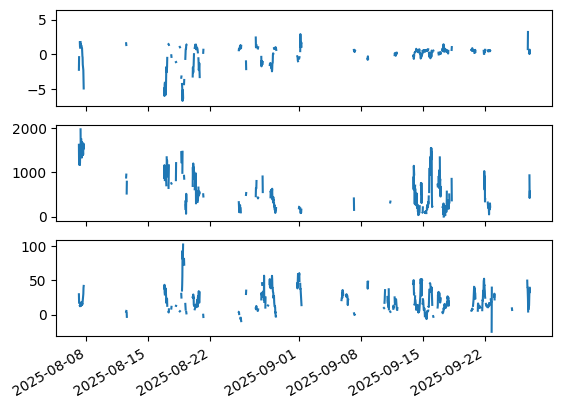

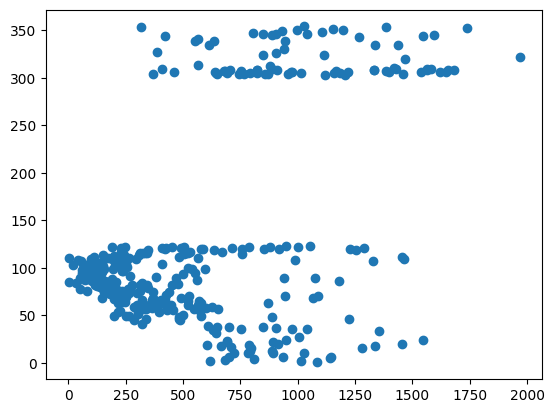

In [473]:
import pandas as pd
df = pd.read_csv(r'U:\data-dump\SCL\2025\20250910\57840_Flux_AmeriFluxFormat_13.dat',na_values="NAN")
df2 = pd.read_csv(r'U:\data-dump\SCL\2025\20250910\57840_Flux_AmeriFluxFormat_12.dat',na_values="NAN")
df3 = pd.read_csv(r'U:\data-dump\SCL\2025\20250927\57840_Flux_AmeriFluxFormat_13.dat',na_values="NAN")
df4 = pd.read_csv(r'U:\data-dump\SCL\2025\20250927\57840_Flux_AmeriFluxFormat_14.dat',na_values="NAN")
df2.columns = df.columns
df3.columns = df.columns
df4.columns = df.columns
df = pd.concat([df2,df,df3,df4])
df=df.join(db['CO2_sig_strgth_Min'])

df.index=pd.to_datetime(df['TIMESTAMP_END'],format='%Y%m%d%H%M')
df=df.sort_index()
df = df.resample('30min').asfreq()
# df.loc[df['u']]
df.loc[df['USTAR']<.1,['FC','FCH4']]=np.nan
# print(df['FC_SSITC_TEST'].describe())

for flux in ['FC','FCH4','LE']:
    df.loc[df[f'{flux}_SSITC_TEST']>0,flux]=np.nan
    df.loc[((df[flux].mean()-df[flux])/df[flux].std()).abs()>3,flux]=np.nan
    df.loc[df['USTAR']<.15,flux]=np.nan
    df.loc[df['CO2_sig_strgth_Min']<.95,flux]=np.nan

df.loc[df['FCH4']<0,'FCH4']=np.nan
df.loc[((df['WD']>(33+180)-wdsec)&(df['WD']<(33+180)+wdsec)),['FC','FCH4','LE']]=np.nan

# df = LUT(df,'FC')
# df = LUT(df,'FCH4')
# df = LUT(df,'LE')

fig,ax=plt.subplots(3)
# df['FC'] = (df['FC']).interpolate()
# df['FCH4'] = (df['FCH4']).interpolate()
ax[0].plot(df['FC'])
ax[1].plot(df['FCH4'])
ax[2].plot(df['LE'])
df[['FC','FCH4','LE']].mean()

fig.autofmt_xdate()


plt.figure()
plt.scatter(df['FCH4'],df['WD'])

print(df[['FC','FCH4']].mean())#*12.01*1800*48*1e-6*[1,1e-3]*31)
# df.columns
db = df.copy()
db[['co2_flux','ch4_flux']] = db[['FC','FCH4']]
df.columns

99.746 3.369
-2.801 0.334
42.112 2.723


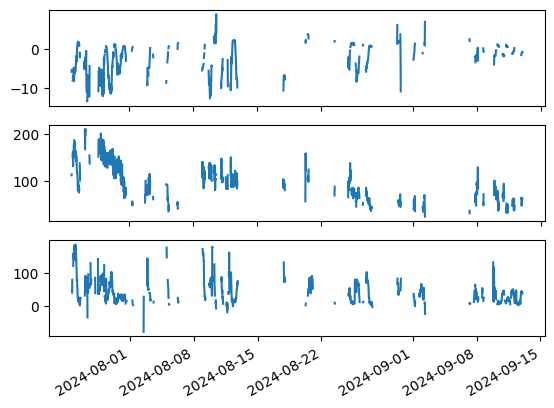

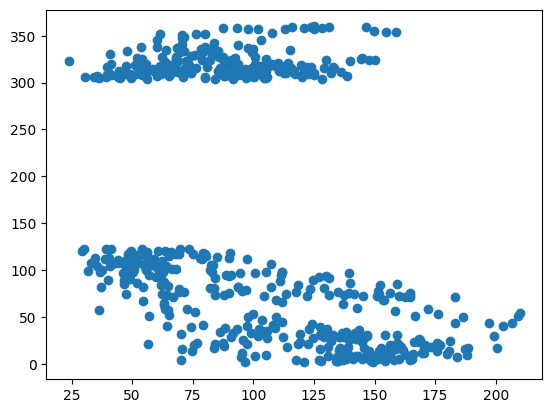

In [474]:
df = pd.read_csv(r"C:\Users\jskeeter\OneDrive - NRCan RNCan\Documents\Presentations\CANCH4\Data\eddypro_t_full_output_2025-05-02T224906_exp.csv",
                 skiprows=[0,2],header=[0],na_values=-9999)#,parse_dates={'datetime':['date','time']})
df.index=pd.to_datetime(df['date']+' '+df['time'])#df['datetime']
# df['ch4_flux'].describe()
df.loc[df['qc_ch4_flux']>1,'ch4_flux'] = np.nan
df.loc[df['u*']<.15,'ch4_flux'] = np.nan
df.loc[df['diag_77_mean']<20,'ch4_flux'] = np.nan
df.loc[((df['ch4_flux'].mean()-df['ch4_flux'])/df['ch4_flux'].std()).abs()>3,'ch4_flux']=np.nan

df.loc[df['qc_co2_flux']>1,'co2_flux'] = np.nan
df.loc[df['u*']<.15,'co2_flux'] = np.nan
df.loc[df['diag_77_mean']<20,'co2_flux'] = np.nan
df.loc[((df['co2_flux'].mean()-df['co2_flux'])/df['co2_flux'].std()).abs()>3,'co2_flux']=np.nan


df.loc[df['qc_LE']>1,'LE'] = np.nan
df.loc[df['u*']<.15,'LE'] = np.nan
df.loc[((df['LE'].mean()-df['LE'])/df['LE'].std()).abs()>3,'LE']=np.nan

df.loc[((df['wind_dir']>(33+180)-wdsec)&(df['wind_dir']<(33+180)+wdsec)),['ch4_flux','co2_flux','LE']]=np.nan

df['ch4_flux']=df['ch4_flux']*1e3

# def LUT(df,flux):
#     print(df[flux].isna().sum())
#     df['HR'] = df.index.hour
#     HR = df[[flux,'HR']].groupby('HR').median()
#     for i,row in df.iterrows():
#         if np.isnan(row[flux]):
#             df.loc[df.index==i,flux] = HR.loc[i.hour].values[0]
#     return(df)
# for flux in ['co2_flux','LE','ch4_flux']:
#     df=LUT(df,flux)
# df = LUT(df,'co2_flux')
# df = LUT(df,'ch4_flux')

fig,ax=plt.subplots(3)
ax[0].plot(df['co2_flux'])
ax[1].plot(df['ch4_flux'])
ax[2].plot(df['LE'])

for flux in ['ch4_flux','co2_flux','LE']:
    print(df[flux].mean().round(3),(1.96*df[flux].std()/df[flux].count()**.5).round(3))


    
fig.autofmt_xdate()


plt.figure()
plt.scatter(df['ch4_flux'],df['wind_dir'])

In [475]:
full = pd.concat([df[['ch4_flux','co2_flux','LE']],db[['ch4_flux','co2_flux','LE']]])#*[1e-1,1,1]])

full['ch4_flux'] = full['ch4_flux']# * 1e-6*16.04*1800*48*31
full['co2_flux'] = full['co2_flux']# * 1e-6*44.01*1800*48*31

for flux in ['ch4_flux','co2_flux','LE']:
    print(flux,full[flux].mean().round(3),(1.96*df[flux].std()/(df[flux].count()**.5)).round(3),df[flux].count())

def LUT(df,flux):
    # print(df[flux].isna().sum())
    df['HR'] = df.index.hour
    df['M'] = df.index.month
    HR = df[[flux,'HR','M']].groupby(['HR','M']).median()

    for i,row in df.iterrows():
        if np.isnan(row[flux]):
            df.loc[df.index==i,flux] = HR.loc[i.hour,i.month].values[0]
    return(df)

full = LUT(full,'ch4_flux')
full = LUT(full,'co2_flux')
full = LUT(full,'LE')

print('LUT')


for flux in ['ch4_flux','co2_flux','LE']:
    print(flux,full[flux].mean().round(3),(1.96*df[flux].std()/(df[flux].count()**.5)).round(3),df[flux].count())

print(full['ch4_flux'].mean()* 1e-9*12.01*1800*48*30)
# print('\n\nby season\n\n')
# print(full.resample('M').mean()*31*48)
# print(full.loc[full.index.month<11].mean(),full.loc[full.index.month<11].std()/full.loc[full.index.month<9].count()**.5*1.96)
# print(full.loc[full.index.month>=9].mean(),full.loc[full.index.month<9].std()/full.loc[full.index.month>=9].count()**.5*1.96)
# 

# full.groupby(full.index.month).mean()['co2_flux'],(full.groupby(full.index.month).std()['co2_flux']/full.groupby(full.index.month).count()['co2_flux']**.5)*1.96


ch4_flux 285.997 3.369 560
co2_flux -1.587 0.334 541
LE 33.26 2.723 736
LUT
ch4_flux 181.201 3.369 560
co2_flux -1.163 0.334 541
LE 29.741 2.723 736
5.640762515766179


In [378]:
4.6*24

110.39999999999999

In [364]:
abc = pd.read_csv(r"C:\Users\jskeeter\Downloads\ABCFlux V2 - ABCFluxv2.ter.aq.csv",header=[0],skiprows=[1,2,3])

C:\Users\jskeeter\AppData\Local\Temp\ipykernel_19768\8165929.py:1: DtypeWarning: Columns (10,21,23,29,30,31,32,33,34,35,36,37,38,40,42,49,58,62,63,65,86,87,95,96,98,99,100,104,109,110,115,116,121,123,124,128) have mixed types. Specify dtype option on import or set low_memory=False.
  abc = pd.read_csv(r"C:\Users\jskeeter\Downloads\ABCFlux V2 - ABCFluxv2.ter.aq.csv",header=[0],skiprows=[1,2,3])


In [446]:
df = abc.loc[((abc['flux_method_detail'].str.contains('eddy')&(abc['ch4_flux_total'].isna()==False)&(abc['latitude']>=69)))].copy()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.loc[df['ch4_flux_total']>3,'citation'].values#.sort_values(by='latitude')#.describe()

abc.loc[((abc['flux_method_detail'].str.contains('eddy'))),'ch4_flux_total'].dropna().sort_values()[-25:]

1883     3.625120
14550    3.660000
14514    3.700000
1895     3.703685
1882     3.777529
12432    3.789199
14515    3.810000
12433    3.820735
14538    3.850000
14480    3.980000
9271     3.980299
14490    4.070000
14527    4.110000
10963    4.163469
9269     4.183086
14502    4.200000
14526    4.200000
14491    4.240000
9287     4.296642
9277     4.821665
9288     5.078301
9290     5.083033
9262     5.746842
9270     5.765196
9289     8.240826
Name: ch4_flux_total, dtype: float64

In [496]:
st = '''
a: b
c: |-
    d
    e
f: g
'''

st = '''
base: &ANCHOR
- 1
- 2
object:
  tmp: *ANCHOR
  y: 2'''

import yaml
yaml.safe_load(st)


{'base': [1, 2], 'object': {'tmp': [1, 2], 'y': 2}}

In [484]:
import yaml

data = {
    'key1': 'This is a normal string.',
    'key2': 'This is a multiline string.\nIt preserves all newlines and spacing.\nSpecial characters like "\\" are treated literally.'
}

# Dump the data with the literal style indicator for all strings
yaml_output = yaml.dump(data, default_style='|', sort_keys=False)

print(yaml_output)


"key1": |-
  This is a normal string.
"key2": |-
  This is a multiline string.
  It preserves all newlines and spacing.
  Special characters like "\" are treated literally.



In [500]:
import yaml

def custom_string_representer(dumper, data):
    if '\n' in data:
        # Use the literal style '|' for multiline strings
        return dumper.represent_scalar('tag:yaml.org,2002:str', data, style='|')
    # Use default representation for single-line strings
    return dumper.represent_scalar('tag:yaml.org,2002:str', data)

# Add the custom representer to the dumper
yaml.add_representer(str, custom_string_representer)

data = {
    'single_line': 'This is a single line string.',
    'multi_line': 'This is a multiline string.\nIt has multiple lines.\n',
    'another_single': 'Another single line.',
    'path':os.path.join('a','no'),
    'a':1
}

# # Dump the data using the custom representer
# with open('output_pyyaml.yaml', 'w') as f:
yout = yaml.dump(data, sort_keys=False) # sort_keys=False preserves original order for clarity
print(yout)


single_line: This is a single line string.
multi_line: |
  This is a multiline string.
  It has multiple lines.
another_single: Another single line.
path: a\no
a: 1



In [510]:
a = {'x':{'y':['z']}}
a['z'] = a['x'].copy()
# a = {'x':'y','z':'null'}

yout = yaml.dump(a, sort_keys=False,default_flow_style=False) # sort_keys=False preserves original order for clarity
print(yout)
yaml.safe_load(yout)

x:
  y: &id001
  - z
z:
  y: *id001



{'x': {'y': ['z']}, 'z': {'y': ['z']}}

In [515]:
import sys
from ruamel.yaml import YAML
from ruamel.yaml.comments import CommentedMap
from ruamel.yaml.scalarstring import LiteralScalarString

def CM(**kw):
    # Helper function for creating CommentedMap instances
    return CommentedMap(**kw)

longStrng = LiteralScalarString('''some
long
string''')

longStrng.yaml_set_anchor('long')

# 1. Create the common data structure
common_data = CM(x=1, y=2,z=longStrng)

# 2. Assign the custom anchor name
common_data.yaml_set_anchor('someChode')

# 3. Use the same object in multiple places
data = CM(
    base_config=common_data,
    other_config=CM(
        tmp=common_data,
        z=3
    ),
    longString=longStrng
)

# 4. Dump the data to see the anchors/aliases
yaml = YAML()
yaml.dump(data, sys.stdout)


base_config: &someChode
  x: 1
  y: 2
  z: &long |-
    some
    long
    string
other_config:
  tmp: *someChode
  z: 3
longString: *long


In [ ]:
import pandas as pd
import numpy as np

def calcDays(Name,start,end,Hotel=False,kind='Work'):
    ix = pd.date_range(start,end,freq='1d')
    days = pd.DataFrame(index=ix,data={Name:[kind]*len(ix)})
    if kind == 'Work':
        if Hotel:
            days.loc[days.index[0:2],Name] = 'Travel'
            days.loc[days.index[-2:],Name] = 'Travel'
        else:  
            days.loc[days.index[0:1],Name] = 'Travel'
            days.loc[days.index[-1:],Name] = 'Travel'

        r = 0
        for i,row in days.iterrows():
            if r == 10:
                days.loc[i,Name] = 'Rest'
                r = 0
            elif row[Name] == 'Work':
                r += 1
            
    return(days)

Names = ['June','Peter','Marcus','Jayden','Oliver']
GSC = ['June','Peter','Marcus']


Peter = pd.DataFrame()
for r in [['2026-04-07','2026-04-24'],
          ['2026-07-27','2026-08-14']]:
    Peter = pd.concat([Peter,calcDays('Peter',r[0],r[1],Hotel=True)])

June = pd.DataFrame()
for r in [['2026-04-08','2026-04-23'],
          ['2026-06-05','2026-06-13'],
          ['2026-07-28','2026-08-13'],
          ['2026-09-28','2026-10-05']]:
    June = pd.concat([June,calcDays('June',r[0],r[1],Hotel=False)])

Marcus = pd.DataFrame()
for r in [['2026-04-07','2026-04-24'],
          ['2026-07-27','2026-08-14']]:
    Marcus = pd.concat([Marcus,calcDays('Marcus',r[0],r[1],Hotel=True)])

Jayden = pd.DataFrame()
for r in [['2026-04-07','2026-04-24'],
          ['2026-07-27','2026-08-14']]:
    Jayden = pd.concat([Jayden,calcDays('Jayden',r[0],r[1],Hotel=True)])

Oliver = pd.DataFrame()
for r in [['2026-06-05','2026-06-13'],]:
    Oliver = pd.concat([Oliver,calcDays('Oliver',r[0],r[1],Hotel=True)])


Heli = pd.DataFrame()
for h,r in zip(
    [2.5,
     5,
     2.5,
     4,
     3],
    [['2026-06-07','2026-06-07'],
     ['2026-06-08','2026-06-08'],
     ['2026-06-11','2026-06-11'],
     ['2026-08-05','2026-08-07'],
     ['2026-10-01','2026-10-01']]):
    Heli = pd.concat([Heli,calcDays('Helicopter Hours',r[0],r[1],kind=h)])#.fillna(0)

Boat = pd.DataFrame()
for y,r in zip(
    [0,
    1],
    [['2026-06-07','2026-06-11'],
    ['2026-08-03','2026-08-10']]):
    Boat = pd.concat([Boat,calcDays('Boat',r[0],r[1],kind=True)])#.fillna(0)

All = pd.DataFrame(index=pd.date_range('2026-04-06','2026-10-06',freq='1d'))

All = All.join(June).join(Peter).join(Marcus).join(Jayden).join(Oliver).join(Heli).join(Boat)
All['Truck'] = (((All[Names]=='Work').sum(axis=1)>0)|((All[Names]=='Rest').sum(axis=1)>0))*1
All['Snowmobile'] = ((All[Names]=='Work').sum(axis=1)>0)*1
All['Boat'] = All['Boat']*1
All.loc[All.index.month != 4,'Snowmobile'] = 0


All['Hotel'] = ((All[GSC]=='Travel').rolling(2).sum().shift(-1)>1).sum(axis=1)


All[Names] = All[Names].fillna('')


# All['Rowhouse'] = (All[GSC]!='').sum(axis=1)-All['Hotel']#+ ((All[GSC]=='').shift(-1)).sum(axis=1))
All['Rowhouse']= ((All[GSC]!='')&(All[GSC].shift(-1)!='')).sum(axis=1) - All['Hotel']


All['Campsite'] = np.ceil(All['Rowhouse']/len(GSC)).astype(int)
All.loc[((All.index.month>=6)&(All.index.month<=8)),'Rowhouse']=0
All.loc[((All.index.month<6)|(All.index.month>8)),'Campsite']=0


Nums = [c for c in All.columns if c not in Names]
All[Nums] = All[Nums].fillna(0)

All





C:\Users\jskeeter\AppData\Local\Temp\ipykernel_12504\971487704.py:103: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  All[Nums] = All[Nums].fillna(0)


,June,Peter,Marcus,Jayden,Oliver,Helicopter Hours,Boat,Truck,Snowmobile,Hotel,Rowhouse,Campsite
2026-04-06,,,,,,0.0,0,0,0,0,0,0
2026-04-07,,Travel,Travel,Travel,,0.0,0,0,0,2,0,0
2026-04-08,Travel,Travel,Travel,Travel,,0.0,0,0,0,0,3,0
2026-04-09,Work,Work,Work,Work,,0.0,0,1,1,0,3,0
2026-04-10,Work,Work,Work,Work,,0.0,0,1,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2026-10-02,Work,,,,,0.0,0,1,0,0,1,0
2026-10-03,Work,,,,,0.0,0,1,0,0,1,0
2026-10-04,Work,,,,,0.0,0,1,0,0,1,0
2026-10-05,Travel,,,,,0.0,0,0,0,0,0,0


In [ ]:
# All['x'] = ((All[GSC]=='').shift(-1)).sum(axis=1)
# # All[['Rowhouse','Hotel','x']]
# ((All[GSC]!='')&(All[GSC].shift(-1)!='')).sum(axis=1)


2026-04-06    0
2026-04-07    2
2026-04-08    3
2026-04-09    3
2026-04-10    3
             ..
2026-10-02    1
2026-10-03    1
2026-10-04    1
2026-10-05    0
2026-10-06    0
Freq: D, Length: 184, dtype: int64